## Estimativa de coeficientes para regressão logística através de gradient descent e cross entropy

### Objetivo 
Através de um banco de dados, contendo variáveis e seus respectivos resultados, precisamos treinar uma função f(x) de forma que esta função nos dê resultados preferencialmente iguais aos coletados, pois assim podemos usar esta função na estimado de outros dados.

#### Teorias utilizadas
- Gradiente
- Descida Gradiente 
- Cross Entropy

#### Dados Coletados


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

notas = pd.read_csv('https://raw.githubusercontent.com/celsocrivelaro/simple-datasets/main/notas-estudantes.csv')
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    neg = (notas['resultado'] == 0)
    pos = (notas['resultado'] == 1)
    
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][["nota_1"]], data[pos][["nota_2"]], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][["nota_1"]], data[neg][["nota_2"]], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

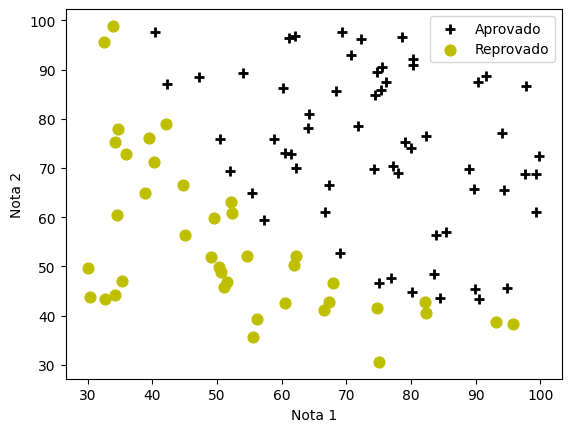

In [2]:
plotData(notas, 'Nota 1', 'Nota 2', 'Aprovado', 'Reprovado')

### Funções montadas para o gradiente e para a estimativa

#### Função de classificação f(x) sigmóide
A função **sigmóide** é utilizada para tranformar um dado quatitativo em qualitativo. A través da função, podemos atribuir significados binários à resultante $y$ de nossas variaveis uqntitativas $x$.

$$f(x) = \frac{1}{1+e^{ - a\cdot x_1 - b\cdot x_2 - c}}$$

ou 

$$f(x_1, x_2) = \frac{1}{1+e^{-(a_1 \cdot x_1 + a_2 \cdot x_2 + a_3)}}$$



#### Função de erro err(x) cross entropy
Seja $f(x^i_1, x^i_2) = F_i$ e $Y$ nossos dados coletados

$$ERR(Y_i, F_i) = \sum_{i=1}^{N} ( Y_i \cdot \ln{F_i} + (1-Y_i)\cdot(\ln{1 - F_i} ))$$

<br>

#### Derivadas da função de erro para o gradiente

z = f(x,y)

∂L/∂a = 1/N * X * (p(x,y) - z)

∂L/∂b = 1/N * Y * (p(x,y) - z)

∂L/∂c = 1/N * 1 * (p(x,y) - z)

In [3]:

def sigmoidal(a1, a2, a3, x1, x2): 
    e = np.exp(-a1*x1 -a2*x2 - a3, dtype=np.float128);
    return 1 / (1 + e);

def perda(y: np.array, p: np.array):
    N = len(y);
    values = -(y * np.log(p) + (1 - y) * np.log(1 - p)); 
    return np.sum(values)/N;

def gradiente(a1, a2, a3, x1, x2, y):
    N = len(y);
    grada1 = np.sum(x1 * (sigmoidal(a1, a2, a3, x1, x2) - y)) / N
    grada2 = np.sum(x2 * (sigmoidal(a1, a2, a3, x1, x2) - y)) / N
    grada3 = np.sum(sigmoidal(a1, a2, a3, x1, x2) - y)/N
    return grada1, grada2, grada3;



#### Classificador

O Classificador armazena informações como erros, os trajetos dos coeficientes e é delimitado pelo **alpha** e pelo **lim**, não quero falar muito sobre ele, mas a operação realizada no cálculo dos coeficientes é que para cada iteração:

Seja $A$ o conjunto dos coeficientes, para cara $a_i \in A$:

$$a_i \leftarrow a_i - \alpha \cdot \frac{\partial ERR}{\partial a_i}$$

ou

$$A \leftarrow A - \alpha \nabla ERR$$

In [4]:
def classificador(y, x1, x2, a1 = 0.01, a2 = 0.01, a3 = 3, iters = 10000, alpha = 1e-6, lim = 1e-6):
    N = len(y);
    cnt = 0;
    err_atual = 0;
    err_anter = float('inf');
    erros = []
    a1_list = []
    a2_list = []
    for i in range(1,iters):
        estimados = sigmoidal(a1, a2, a3, x1, x2);
        err_atual = perda(y, estimados); 
        erros.append(err_atual);
        a1_list.append(a1);
        a2_list.append(a2);
        
        cnt+= 1;
        if (abs(err_atual - err_anter) <= lim): 
            print("Coeficientes encontrados {} iterações".format(cnt));
            print(" a1 = {}\n a2 = {}\n a3 = {}".format(a1, a2, a3));
            return a1, a2, a3, np.array(erros, dtype=np.float64), cnt, np.array(a1_list,dtype=np.float64), np.array(a2_list,dtype=np.float64);
        
        #recálculo
        err_anter = err_atual;
        grad1, grad2, grad3 = gradiente(a1, a2, a3, x1, x2, y);       
        a1 -= alpha * grad1;
        a2 -= alpha * grad2;
        a3 -= alpha * grad3;

    print("Coeficientes não encontrados");
    print(" a1 = {}\n a2 = {}\n a3 = {}".format(a1, a2, a3));
    return a1, a2, a3, np.array(erros, dtype=np.float64), cnt, np.array(a1_list,dtype=np.float64), np.array(a2_list,dtype=np.float64);


#Coleta do classificador

x1 = notas.nota_1;
x2 = notas.nota_2;
y = notas.resultado;

a, b, c, erros, cnt, a1_list, a2_list = classificador(y, x1, x2);



Coeficientes encontrados 2815 iterações
 a1 = -0.014693399987865027
 a2 = -0.01721870367277665
 a3 = 2.999366893317447


### Plotagem dos dados

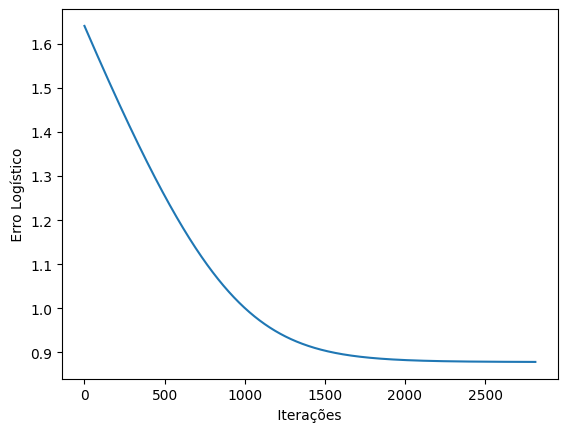

In [5]:


# Plotagem do erro em comparação ao número de iterações
fig, graph = plt.subplots();
index = np.arange(cnt);
graph.plot(index, erros);
graph.set_xlabel(" Iterações ");
graph.set_ylabel(" Erro Logístico ");
fig.show();

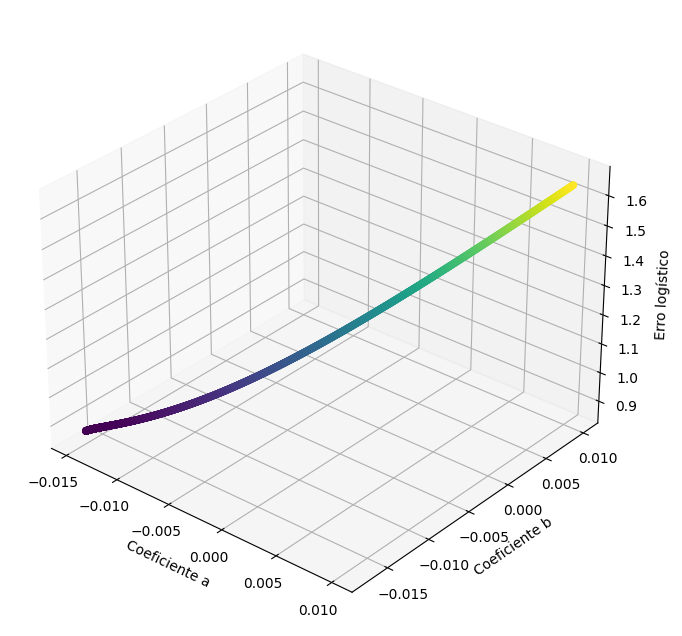

In [6]:
#Plotagem do erro logístico em relação à a, b.
fig = plt.figure(figsize=(16, 8))
ax = plt.axes(projection='3d');
z_axis = erros;
x_axis = a1_list;
y_axis = a2_list;
ax.set_xlabel('Coeficiente a'); # a = a1
ax.set_ylabel('Coeficiente b'); # b = a2
ax.set_zlabel('Erro logístico');
ax.view_init(30, -50)

colour = np.full_like(x_axis, (y_axis+x_axis+z_axis), dtype=np.float64);
ax.scatter(x_axis, y_axis, z_axis, alpha =0.8, c = colour);

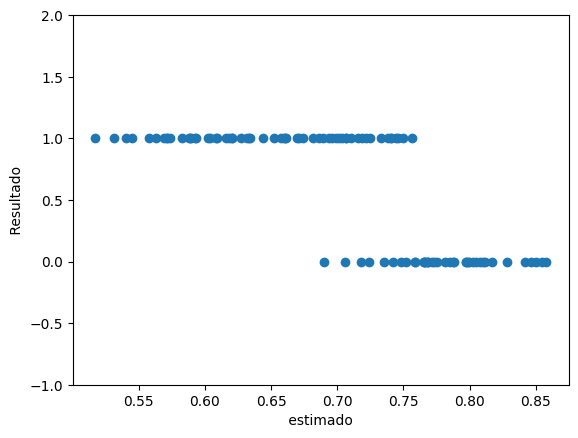

In [7]:


#Plotagem da correlação entre os dados estimados e os coletados.
fig, graph = plt.subplots();
sigmoids = sigmoidal(a, b, c, x1, x2);
graph.scatter(sigmoids, y);
graph.set_xlabel(" estimado ");
graph.set_ylim(-1, 2, 1);
graph.set_ylabel(" Resultado ");
fig.show();

Tivemos 12 resultados errados de um total de 100
Tendo uma chance de erro de aproximadamente: 12.00%


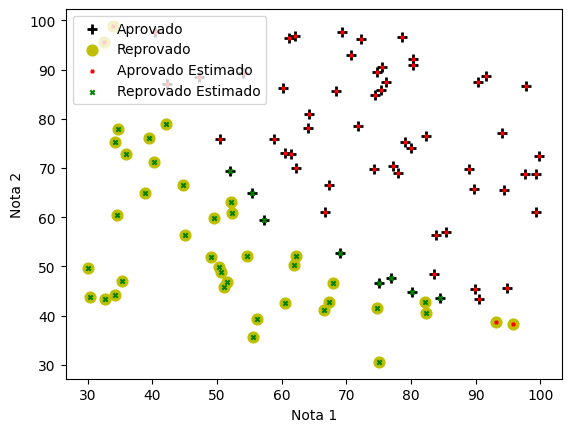

In [8]:
#para qualquer sigmoide menor que 0.7, o aluno é aprovado, para qualquer maior, o aluno é reprovado
# ALGORITMO ELABORADO PARA SOLUÇÃO DESSE VALOR (0.7)
"""
    Sejam R os resultados, e E a classificação do sigmóido, podemos definir um valor I para dividir os resultados e classificarmos eles entre 0 ou 1.

    Definimos um intervalo entre os valores E para cada R, ou seja, definimos (E,R=1) e (E, R=2) para dividirmos o conjunto E em dois, E1 e E0 (aprovado e reprovado). 
    
    Podemos então pegar a intersecção desse conjunto (neste caso entre 0.68 e 0.76), e então tiramos a média de todos os valores neste conjunto, ou seja, todos os valores cujo estimados estão entre, neste caso, 0.68 e 0.76. Este valor possivelmente é o nosso I.


"""


resultado_estimado = np.where(sigmoids < 0.73, 1, 0);

def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    neg = (notas['resultado'] == 0)
    pos = (notas['resultado'] == 1)
    
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][["nota_1"]], data[pos][["nota_2"]], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][["nota_1"]], data[neg][["nota_2"]], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

def plotDataEstimada(data, label_x, label_y, label_pos, label_neg, axes=None):
    neg = (resultado_estimado == 0)
    pos = (resultado_estimado == 1)
    
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][["nota_1"]], data[pos][["nota_2"]], marker='+', c='r', s=10, linewidth=2, label=label_pos)
    axes.scatter(data[neg][["nota_1"]], data[neg][["nota_2"]], marker='x', c='g', s=10, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

plotData(notas, 'Nota 1', 'Nota 2', 'Aprovado', 'Reprovado');
plotDataEstimada(notas, 'Nota 1', 'Nota 2', 'Aprovado Estimado', 'Reprovado Estimado');

quant_erro = 0
for i in range(0, len(y)):
    if resultado_estimado[i] != y[i]:
       quant_erro += 1;

print("Tivemos {} resultados errados de um total de {}".format(quant_erro, len(y)));
print("Tendo uma chance de erro de aproximadamente: {:.2f}%".format(quant_erro/len(y) * 100));
    